In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Leitura e análise inicial dos dados

In [2]:
df = pd.read_csv('../data/gapminder_full.csv')
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [3]:
colunas_ptbr = ['País','Ano','População',
                'Continente','Expectativa de vida','PIB']

df.columns =  colunas_ptbr 
df.columns

Index(['País', 'Ano', 'População', 'Continente', 'Expectativa de vida', 'PIB'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   País                 1704 non-null   object 
 1   Ano                  1704 non-null   int64  
 2   População            1704 non-null   int64  
 3   Continente           1704 non-null   object 
 4   Expectativa de vida  1704 non-null   float64
 5   PIB                  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [5]:
df.isnull().sum()

País                   0
Ano                    0
População              0
Continente             0
Expectativa de vida    0
PIB                    0
dtype: int64

- Não foram encontrados dados faltantes no conjunto de dados
- Foi realizada a tradução das colunas para pt-BR

## Análises de como os dados se comportam e estão distribuídos

In [6]:
df.describe()

,Ano,População,Expectativa de vida,PIB
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [7]:
df['Continente'].unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [8]:
df['Ano'].unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

## Criação de novos dados

In [9]:
# Funções de criação e manipulação de dados
def calcular_diferenca_percentual(grupo):
    grupo['Diferença População (%)'] = grupo['População'].pct_change() * 100
    grupo['Diferença Expectativa de Vida (%)'] = grupo['Expectativa de vida'].pct_change() * 100
    grupo['Diferença PIB (%)'] = grupo['PIB'].pct_change() * 100
    return grupo.dropna()

In [10]:
df.head()

,País,Ano,População,Continente,Expectativa de vida,PIB
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [11]:
df_agrupado = df.groupby(['Continente','Ano']).mean(numeric_only=True).reset_index()
df_agrupado.head()

,Continente,Ano,População,Expectativa de vida,PIB
0,Africa,1952,4.570010e+06,39.135500,1252.572466
1,Africa,1957,5.093033e+06,41.266346,1385.236062
2,Africa,1962,5.702247e+06,43.319442,1598.078825
3,Africa,1967,6.447875e+06,45.334538,2050.363801
4,Africa,1972,7.305376e+06,47.450942,2339.615674


In [12]:
df_diff_percentual = df_agrupado.groupby('Continente').apply(calcular_diferenca_percentual,
                                        include_groups=False).reset_index().drop(['level_1',
                                                                                  'População',
                                                                                  'Expectativa de vida',
                                                                                  'PIB'],
                                                                                  axis=1)
df_diff_percentual.head()

,Continente,Ano,Diferença População (%),Diferença Expectativa de Vida (%),Diferença PIB (%)
0,Africa,1957,11.444698,5.444791,10.591291
1,Africa,1962,11.961712,4.975231,15.365090
2,Africa,1967,13.076027,4.651713,28.301794
3,Africa,1972,13.298971,4.668414,14.107344
4,Africa,1977,13.999564,4.487752,10.528346


## Análises com os dados criados

In [13]:
df_diff_percentual[df_diff_percentual[df_diff_percentual.columns[3]] <= 0]

,Continente,Ano,Diferença População (%),Diferença Expectativa de Vida (%),Diferença PIB (%)
8,Africa,1997,12.859027,-0.058378,4.248785
9,Africa,2002,12.084827,-0.509417,9.274817


In [14]:
df_diff_percentual[df_diff_percentual[df_diff_percentual.columns[4]] <= 0].sort_values('Ano')

,Continente,Ano,Diferença População (%),Diferença Expectativa de Vida (%),Diferença PIB (%)
23,Asia,1962,8.547366,4.551389,-1.008397
26,Asia,1977,10.857477,3.997412,-4.838549
27,Asia,1982,9.461973,5.045051,-4.584321
5,Africa,1982,15.306750,4.058945,-4.035113
6,Africa,1987,15.116799,3.395669,-8.015979
7,Africa,1992,14.655951,0.533864,-0.037616
40,Europe,1992,2.770908,1.083528,-0.887300


- A Europa sofreu uma queda no PIB de **0.8% no ano de 1992**
- A Ásia teve uma diminuição no PIB nos anos de **1962, 1977 e 1982**
- A Africa foi afetada por uma expectativa de vida menor que o ano antecedente nos anos de **1997 e 2002**, assim como em **1982 e 1987** sofreram com o PIB negativo. A queda no PIB **pode estar relacionada** às quedas nos PIB's da Ásia e Europa, para **afirmação** de tal fato mais pesquisas e dados seriam necessários.

In [15]:
correlacao_PIB_Exp = df[['Expectativa de vida','PIB']].corr().iloc[0,1] * 100
correlacao_PIB_Exp

np.float64(58.37062198659794)

- A correlação entre o **PIB e a Expectativa de vida é de 58,37%**, indicando que em locais com PIB maior a expectativa de vida tende a ser maior também.

# Análise de dados de forma visual

In [16]:
# Funções de plotagem

def plotar_graficos_linha(data,titulo):

    fig, ax = plt.subplots(1,3,figsize=(12,6),dpi=150)

    for i,coluna in enumerate(data.columns[2:]):

        sns.lineplot(data=data,x='Ano',y=coluna
                    ,hue='Continente',errorbar=None,
                    style="Continente",
                    markers=True, dashes=False,
                    ax=ax[i])
        
        ax[i].set_title(f'Progressão da {coluna}')
        ax[i].grid()


    
    plt.suptitle(f'{titulo}')
    plt.tight_layout()
    plt.show()


def boxplot_anual(df,ano_selecionado=None):

    fig, ax = plt.subplots(1,2,figsize=(12,6),dpi=150)


    if ano_selecionado != None:

        df_filtrado = df[df['Ano'] == ano_selecionado]
        plt.suptitle(f'Distribuição dos dados no ano de {ano_selecionado}')


    else:
        df_filtrado = df.copy()
        plt.suptitle(f'Distribuição dos dados')



    sns.boxplot(df_filtrado,hue='Continente',y='PIB',ax=ax[0])
    sns.boxplot(df_filtrado,hue='Continente',y='Expectativa de vida',ax=ax[1])

    ax[0].set_title('Distribuição do PIB')
    ax[1].set_title('Distribuição da Exp. de Vida')

    
    plt.tight_layout()
    plt.show()

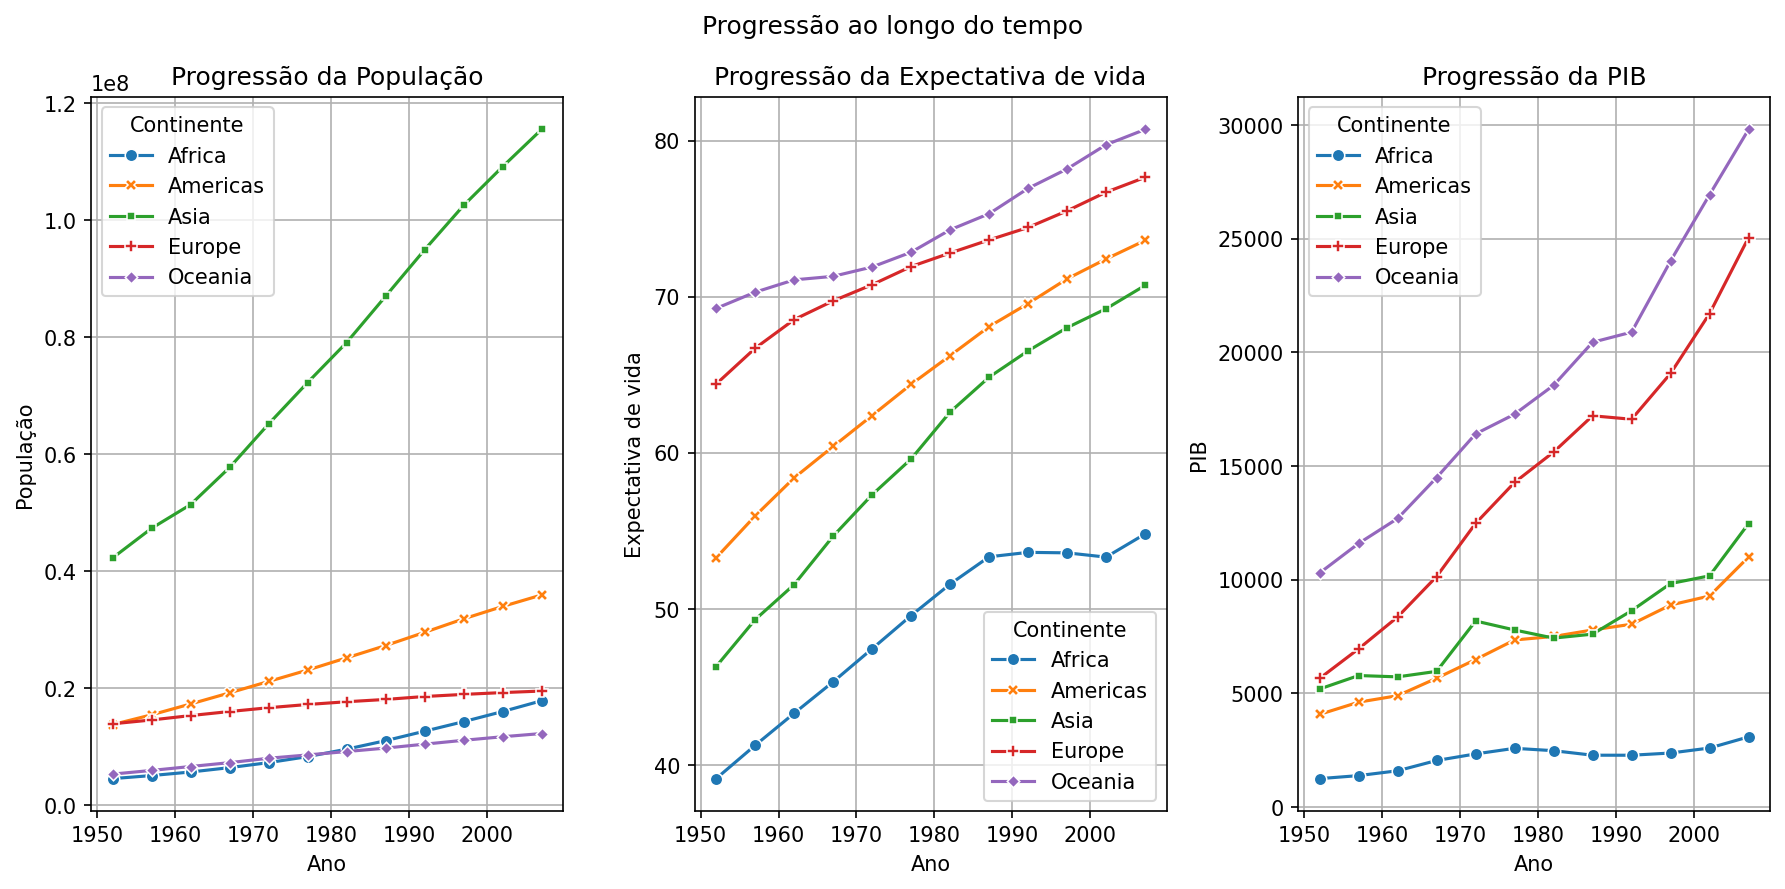

In [17]:
plotar_graficos_linha(df_agrupado,'Progressão ao longo do tempo')

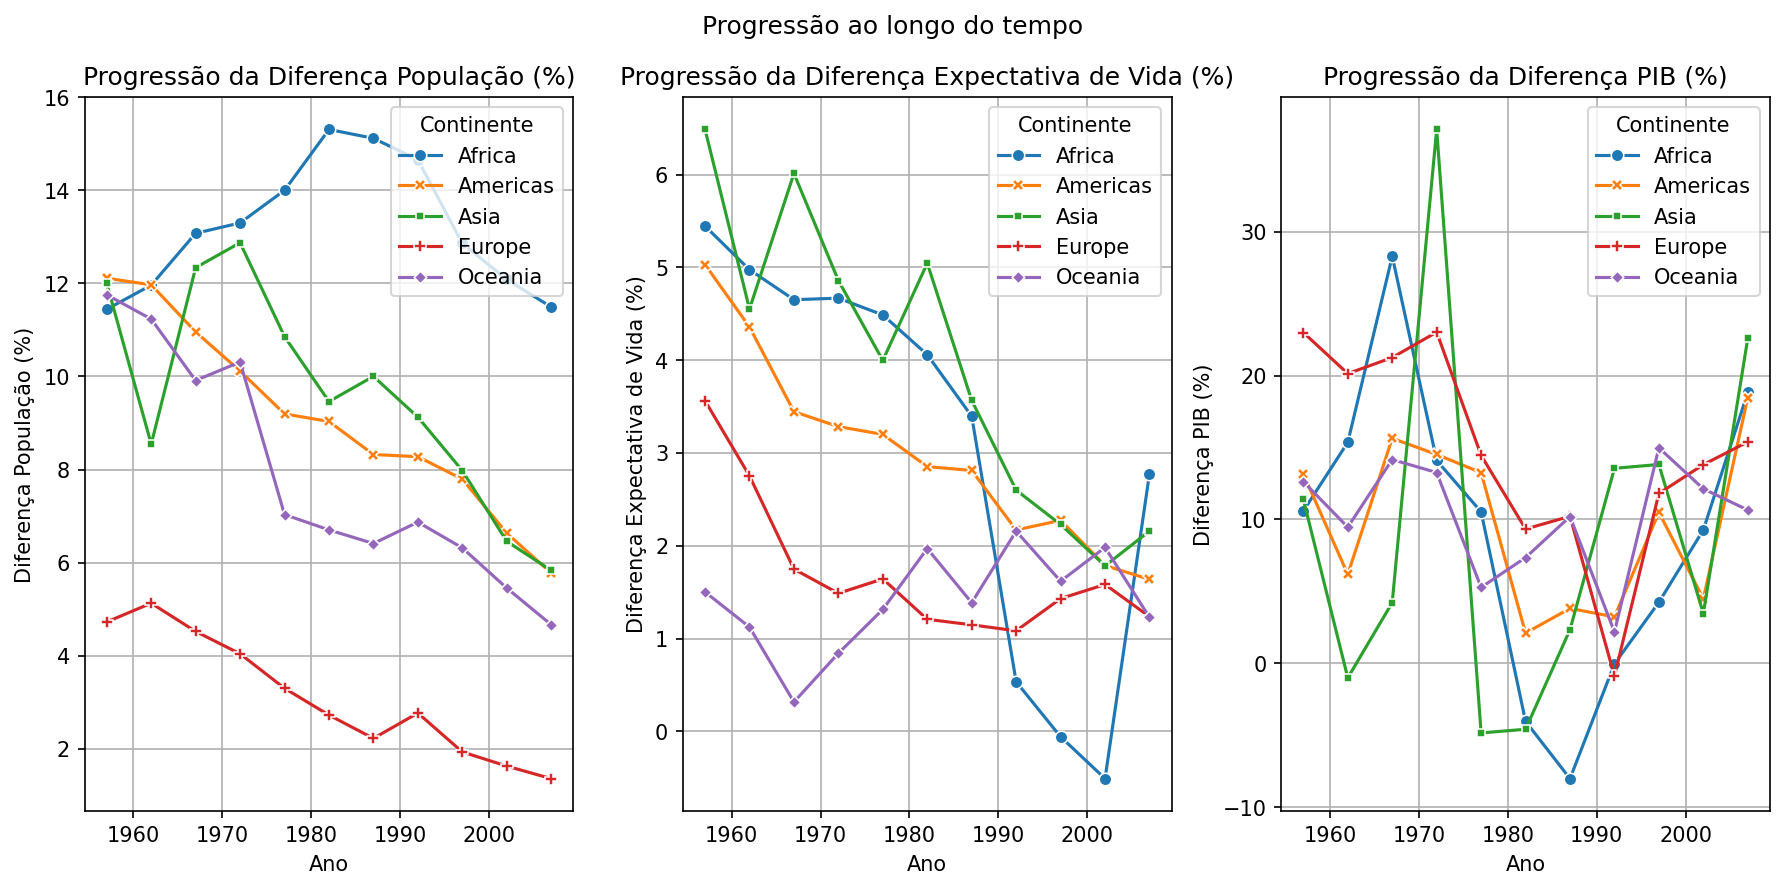

In [18]:
plotar_graficos_linha(df_diff_percentual,'Progressão ao longo do tempo')

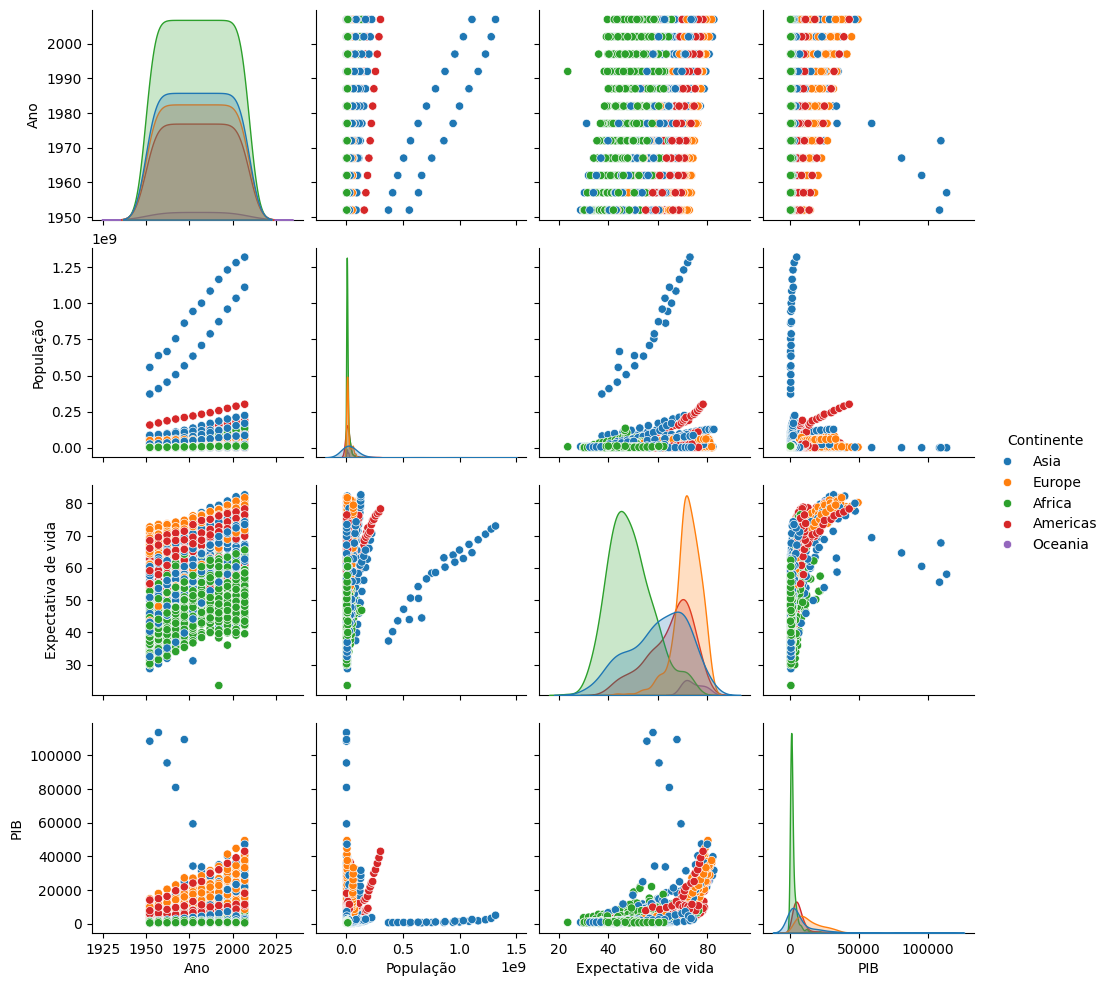

In [19]:
sns.pairplot(df,hue='Continente')

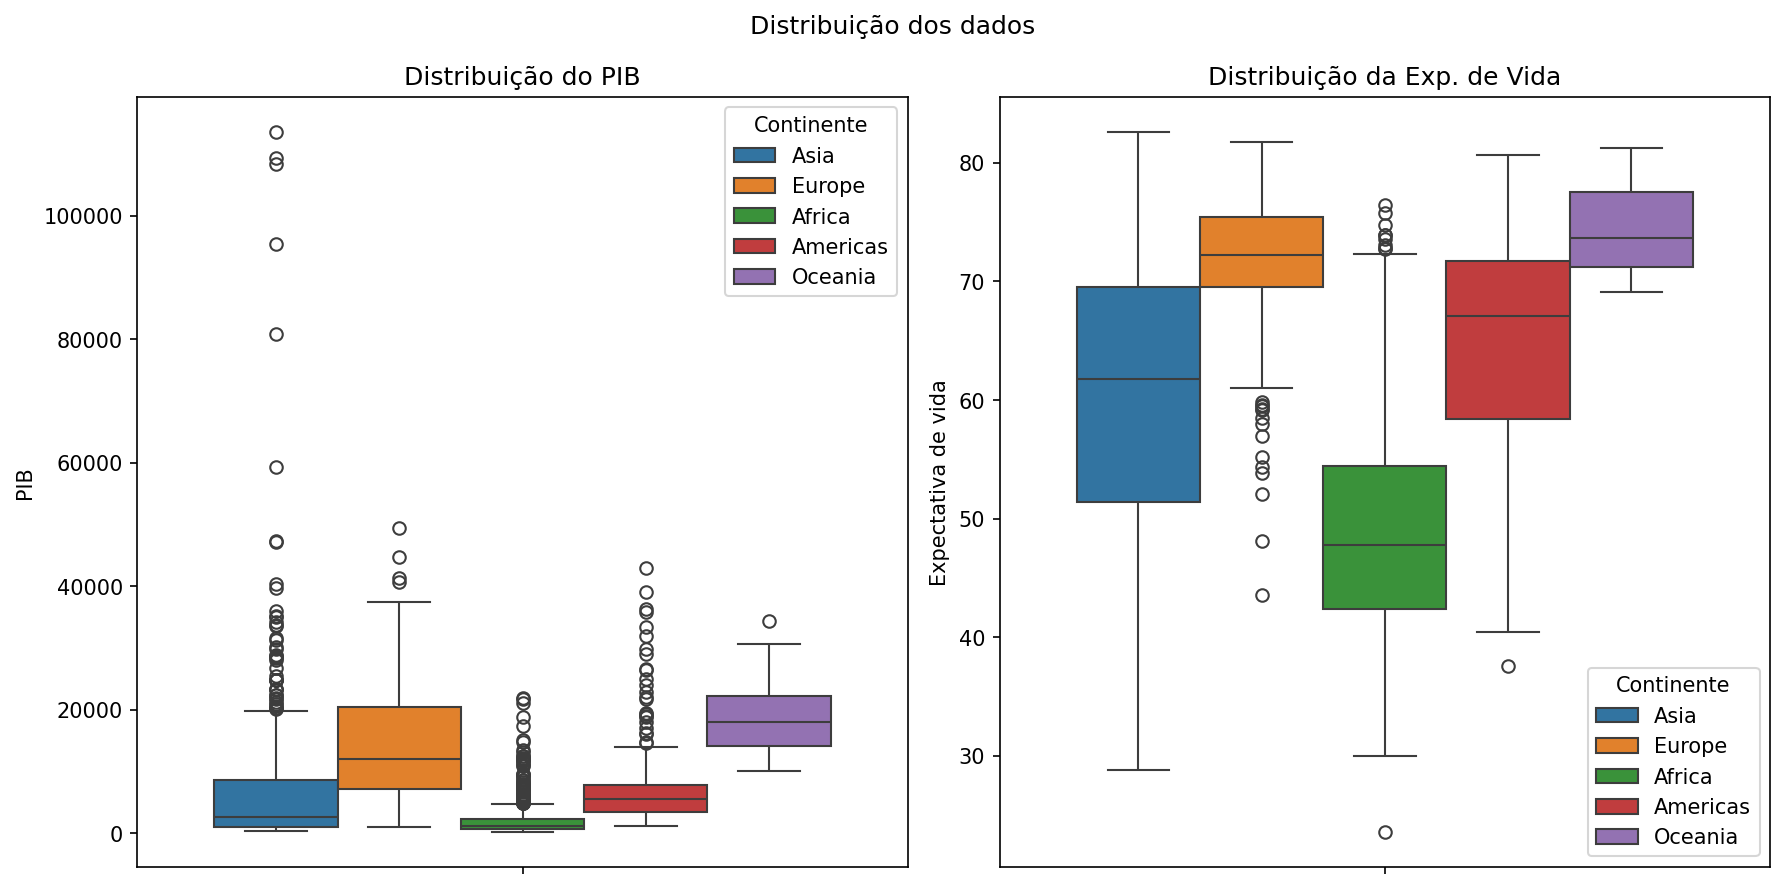

In [20]:
ano_selecionado = df['Ano'].unique()[-2]

boxplot_anual(df,ano_selecionado=None)

As conclusões no tópico da análise dos dados com novas colunas se tornam mais tangíveis de visual, em que incluem:
-  A queda no PIB e Expectativa de vida na África, Ásia e Europa durante os **gráficos de linha**;
-  A Correlação entre expectativa de vida e PIB é representada nos **gráficos de dispersão**, e pode ser observada também nos **boxplots**;

---

Percebe-se também que:

- A progressão da população vem **diminuindo** em percentual em todo o mundo a partir de **meados dos anos 90**.